In [231]:
print("Telecom Customer Churn Assignment")

Telecom Customer Churn Assignment


In [232]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
import warnings #cleanliness of notebook is needed 
warnings.filterwarnings(action="ignore")

In [234]:
df=pd.read_csv(r"C:\AssignmentML_2\telecom_churn_data.csv")

In [235]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [236]:
print(df.shape)

(99999, 226)


In [237]:
df.drop_duplicates()
df.shape

(99999, 226)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [239]:
# finding missing values
missing_obs = []

for i in df.columns:
    nulls = df[df[i] == -1][i].count()
    if nulls > 0:
        missing_obs.append(i)
        nulls_perc = nulls/df.shape[0]
        
        print('{} has {} obs ({:.2%}) missing'.format(i, nulls, nulls_perc))

arpu_6 has 11 obs (0.01%) missing
arpu_7 has 21 obs (0.02%) missing
arpu_8 has 32 obs (0.03%) missing
arpu_9 has 68 obs (0.07%) missing
arpu_2g_6 has 1 obs (0.00%) missing


In [240]:
#df=df.drop("mobile_number", axis=1)

In [241]:
#df=df.drop("mobile_number",axis=1)

In [242]:
#df=df.drop("circle_id",axis=1)

In [243]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [244]:
catcols=df.loc[:,'last_date_of_month_6':'last_date_of_month_9']
print(catcols)

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99994            6/30/2014            7/31/2014            8/31/2014   
99995            6/30/2014            7/31/2014            8/31/2014   
99996            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   
99998            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9  
0                9/30/2014  
1                9/30/2014  
2                9/30/2014  
3                9/

In [245]:
df=df.drop(catcols,axis=1)

In [246]:
df=df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1)

In [247]:
df=df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1)

In [248]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35)
memory usage: 163.3 MB


In [250]:
df['aon']

0         968
1        1006
2        1103
3        2491
4        1526
         ... 
99994    3199
99995    2052
99996     185
99997     478
99998     751
Name: aon, Length: 99999, dtype: int64

In [251]:
# Exploratory Data Analysis (EDA)

In [252]:
df.shape

(99999, 214)

<Axes: >

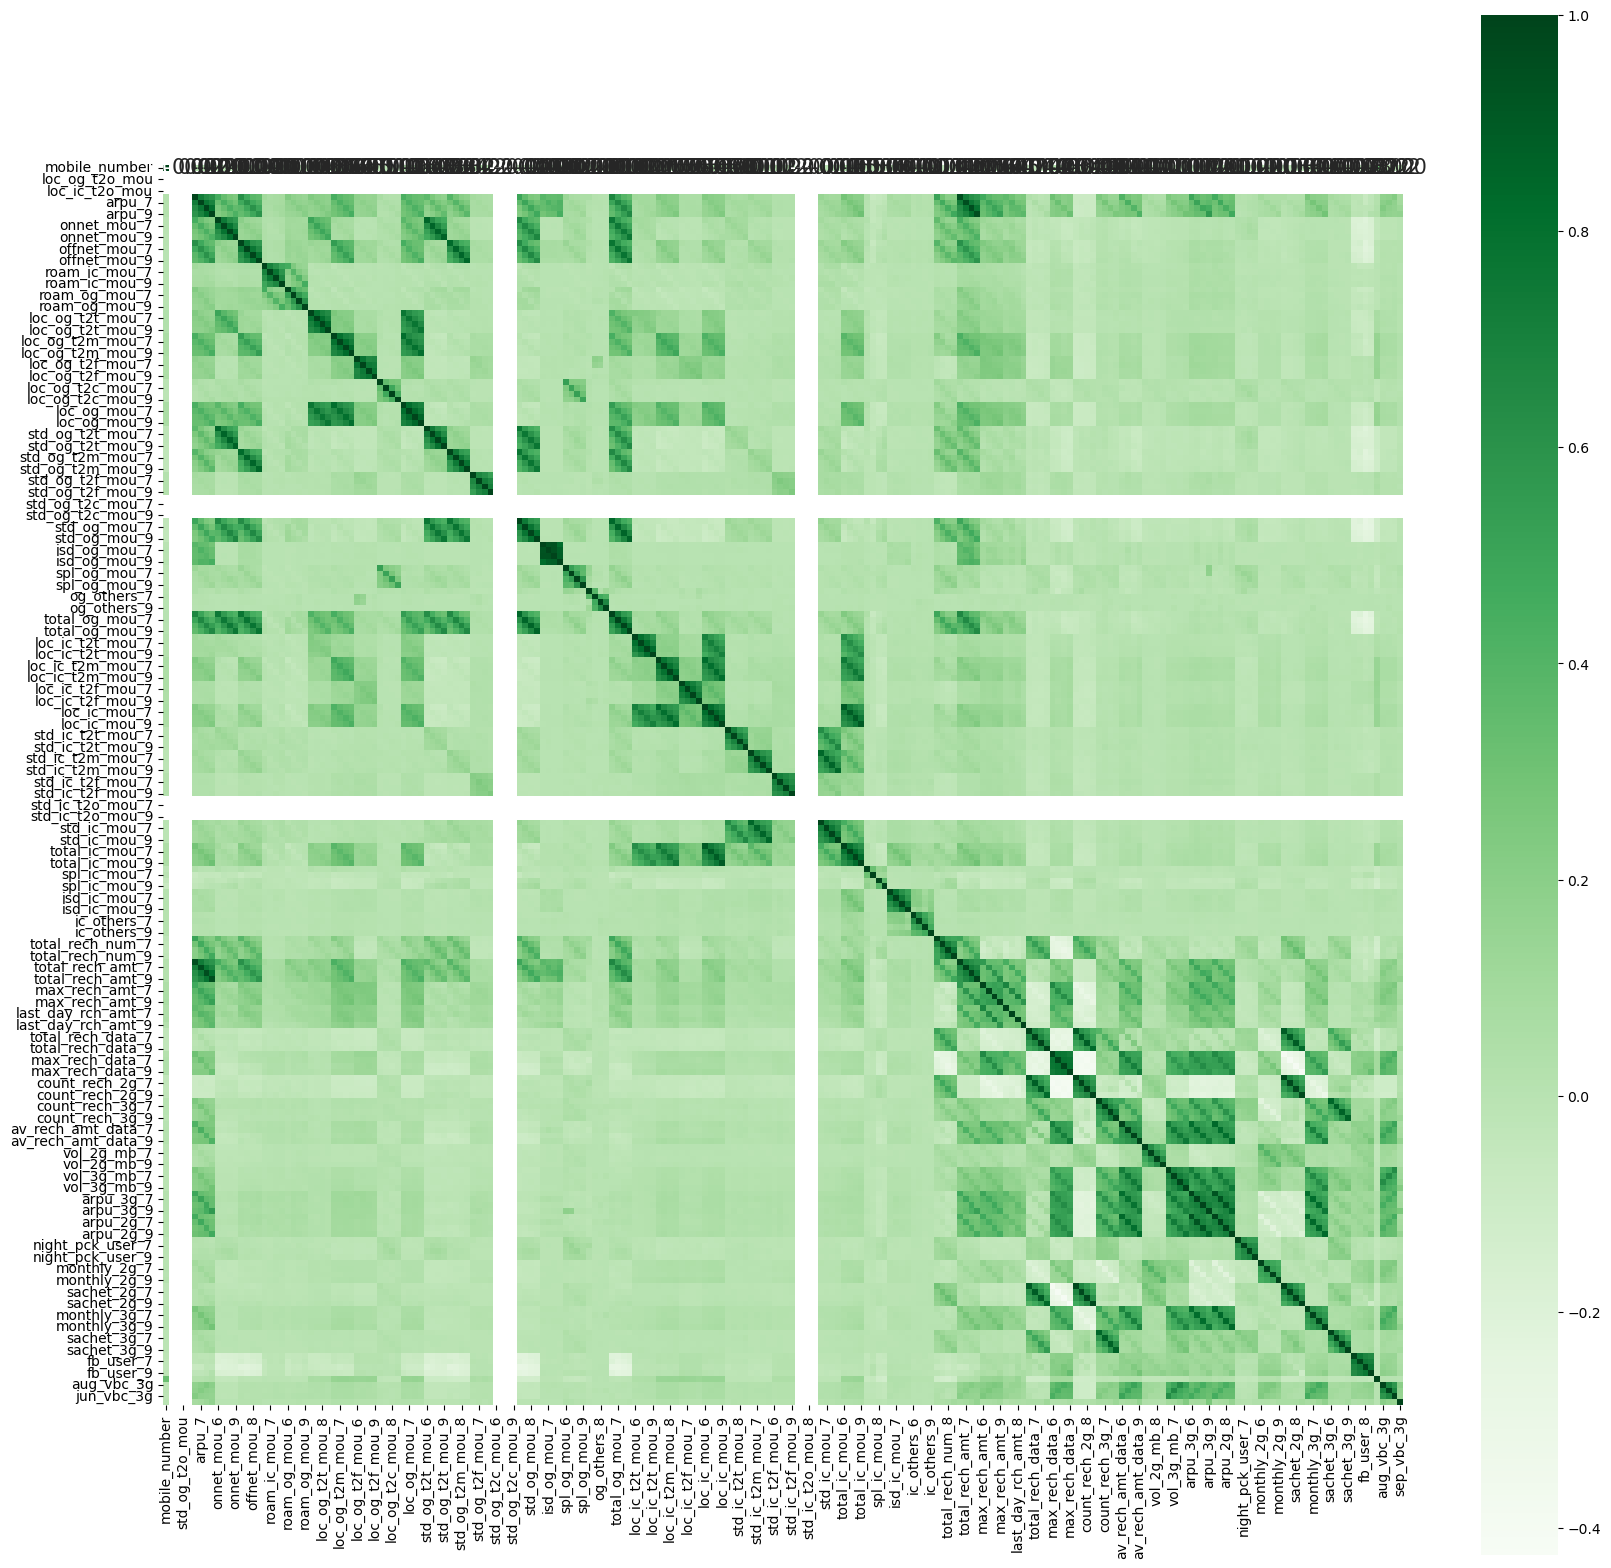

In [253]:
# check correlation of continuous vars with target

# Finding out the correlation between the features
conti_cols_corr = df.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(conti_cols_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [254]:
# Feature Engineering

In [255]:
churn=df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
churn

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,188.04,72.11,0.00,0.00
2,517.74,124.94,0.00,8.42
3,305.38,362.54,0.00,0.00
4,205.31,104.59,0.00,0.00
...,...,...,...,...
99994,154.43,27.14,0.00,0.00
99995,108.84,106.41,0.00,0.00
99996,0.00,0.00,0.00,0.00
99997,2.21,0.00,85.67,4177.14


In [256]:
churn_filtered=churn.apply(lambda row: 1 if (row.total_ic_mou_9 == 0 and row.total_og_mou_9 == 0) else 0, axis=1)

In [257]:
churn_filtered

0        1
1        0
2        0
3        0
4        0
        ..
99994    0
99995    0
99996    1
99997    0
99998    1
Length: 99999, dtype: int64

In [258]:
df= pd.concat([df,churn_filtered],axis=1)

In [259]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,0
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [260]:
df.shape

(99999, 215)

In [261]:
#df = df.drop(df[(df['churn'] == 0)].index)

In [262]:
#df.head()

In [263]:
max_recharge=df[['max_rech_amt_7','max_rech_amt_8']]


In [264]:
max_recharge.describe()

,max_rech_amt_7,max_rech_amt_8
count,99999.000000,99999.000000
mean,104.752398,107.728207
std,124.523970,126.902505
min,0.000000,0.000000
25%,30.000000,30.000000
50%,110.000000,98.000000
75%,128.000000,144.000000
max,4010.000000,4449.000000


In [265]:
#df= pd.concat([df,max_recharge],axis=1)

In [266]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,0
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [267]:
df = df.drop(df[(df['max_rech_amt_7'] >=30) & (df['max_rech_amt_8'] >=30)].index)

In [268]:
df.shape

(30122, 215)

In [269]:
df.shape

(30122, 215)

In [270]:
df = df.rename(columns={0: 'Churn'})

In [271]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
5,7000286308,109,0.0,0.0,0.0,50.258,58.810,83.386,170.826,50.16,...,NaN,NaN,NaN,NaN,1471,0.0,0.0,0.0,0.0,0
10,7000471350,109,0.0,0.0,0.0,0.400,0.000,281.858,82.638,0.00,...,NaN,NaN,1.0,1.0,414,0.0,0.0,0.0,0.0,0
11,7002006969,109,0.0,0.0,0.0,298.126,21.000,131.617,0.000,439.06,...,NaN,NaN,1.0,NaN,339,0.0,0.0,0.0,0.0,0
14,7001654241,109,0.0,0.0,0.0,63.611,36.634,63.241,55.577,32.09,...,NaN,NaN,NaN,NaN,912,0.0,0.0,0.0,0.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,NaN,NaN,NaN,NaN,667,0.0,0.0,0.0,0.0,0


In [272]:
df["Churn"]

5        0
10       0
11       0
14       0
17       0
        ..
99992    0
99993    1
99994    0
99996    1
99998    1
Name: Churn, Length: 30122, dtype: int64

In [273]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
5,7000286308,109,0.0,0.0,0.0,50.258,58.810,83.386,170.826,50.16,...,NaN,NaN,NaN,NaN,1471,0.0,0.0,0.0,0.0,0
10,7000471350,109,0.0,0.0,0.0,0.400,0.000,281.858,82.638,0.00,...,NaN,NaN,1.0,1.0,414,0.0,0.0,0.0,0.0,0
11,7002006969,109,0.0,0.0,0.0,298.126,21.000,131.617,0.000,439.06,...,NaN,NaN,1.0,NaN,339,0.0,0.0,0.0,0.0,0
14,7001654241,109,0.0,0.0,0.0,63.611,36.634,63.241,55.577,32.09,...,NaN,NaN,NaN,NaN,912,0.0,0.0,0.0,0.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,NaN,NaN,NaN,NaN,667,0.0,0.0,0.0,0.0,0


In [274]:
df.shape

(30122, 215)

In [275]:
# Checking for outliers

In [276]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
count,3.012200e+04,30122.0,29308.0,29308.0,29308.0,30122.000000,30122.000000,30122.000000,30122.000000,27821.000000,...,6389.000000,5104.000000,4790.000000,4855.000000,30122.000000,30122.000000,30122.000000,30122.000000,30122.000000,30122.000000
mean,7.001162e+09,109.0,0.0,0.0,0.0,186.944572,116.095435,101.895238,115.107353,86.446225,...,0.928471,0.932014,0.932150,0.933059,1067.900339,27.560300,29.816332,34.457083,1.354082,0.248224
std,7.103983e+05,0.0,0.0,0.0,0.0,245.235093,173.744878,163.747449,185.793766,232.909885,...,0.257727,0.251746,0.251514,0.249946,895.948439,151.788382,162.551719,172.501917,16.632364,0.431990
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000529e+09,109.0,0.0,0.0,0.0,55.101500,18.282500,3.402500,0.000000,2.500000,...,1.000000,1.000000,1.000000,1.000000,411.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001136e+09,109.0,0.0,0.0,0.0,123.132500,70.292500,58.748000,55.650500,16.260000,...,1.000000,1.000000,1.000000,1.000000,716.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001784e+09,109.0,0.0,0.0,0.0,233.410500,148.011500,135.307500,153.955500,61.510000,...,1.000000,1.000000,1.000000,1.000000,1418.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,7.002170e+09,109.0,0.0,0.0,0.0,423.494000,273.048500,242.748700,299.401200,207.140000,...,1.000000,1.000000,1.000000,1.000000,2600.000000,0.000000,1.950000,17.088000,0.000000,1.000000
95%,7.002289e+09,109.0,0.0,0.0,0.0,591.111250,392.234650,343.798350,429.976100,416.330000,...,1.000000,1.000000,1.000000,1.000000,3050.000000,147.478500,152.998000,202.440000,0.000000,1.000000
99%,7.002387e+09,109.0,0.0,0.0,0.0,1064.867810,770.087930,691.329850,806.602800,1123.726000,...,1.000000,1.000000,1.000000,1.000000,3651.000000,683.454300,701.597100,799.851800,39.453300,1.000000


In [277]:
# Removing NaN TotalCharges rows
df = df[(~df.isnull()).all(axis=1)]

In [278]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
84,7001576437,109,0.0,0.0,0.0,87.296,60.208,33.621,272.831,11.28,...,1.0,1.0,0.0,1.0,508,0.00,0.00,0.00,0.00,0
172,7000038517,109,0.0,0.0,0.0,129.815,66.237,66.249,66.277,25.39,...,1.0,1.0,1.0,1.0,229,0.00,0.00,0.00,0.00,0
176,7001503264,109,0.0,0.0,0.0,745.133,341.058,136.817,230.625,594.59,...,1.0,1.0,1.0,1.0,1012,0.00,0.00,0.00,0.00,0
212,7000294383,109,0.0,0.0,0.0,99.554,157.856,344.313,164.752,0.00,...,1.0,1.0,1.0,1.0,705,0.66,111.65,289.38,90.18,0
282,7001486988,109,0.0,0.0,0.0,105.826,15.135,15.129,47.920,26.68,...,1.0,1.0,0.0,1.0,459,0.00,0.00,0.00,0.00,0


In [279]:
# splitting dataset into train and test
from sklearn.model_selection import train_test_split
y = df.Churn
X = df.drop('Churn', axis=1)
X = X.drop('circle_id', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [280]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [281]:
x = scaler.fit_transform(X)

In [282]:
x[:5,:5]

array([[ 0.6884377 ,  0.        ,  0.        ,  0.        , -0.62047168],
       [-1.48280764,  0.        ,  0.        ,  0.        , -0.33365788],
       [ 0.58513159,  0.        ,  0.        ,  0.        ,  3.81699701],
       [-1.12157438,  0.        ,  0.        ,  0.        , -0.5377848 ],
       [ 0.56215302,  0.        ,  0.        ,  0.        , -0.49547675]])

In [283]:
import statsmodels.api as sm

In [284]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1175
Model:                            GLM   Df Residuals:                      996
Model Family:                Binomial   Df Model:                          178
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1987e-09
Date:                Mon, 03 Jun 2024   Deviance:                   4.3974e-09
Time:                        23:29:29   Pearson chi2:                 2.20e-09
No. Iterations:                    26   Pseudo R-squ. (CS):            0.07033
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8847.9765   2.83e+08   3.13e-05      1.000   -5.54e+08    5.54e+08
mobile_number      -1.268e-06      0.040  -3.14e-05      1.000      -0.079       0.079
loc_og_t2o_mou         0.0148   2391.384   6.17e-06      1.000   -4687.011    4687.040
std_og_t2o_mou        -0.0052    845.288  -6.17e-06      1.000   -1656.740    1656.730
loc_ic_t2o_mou        -0.0028    446.090  -6.17e-06      1.000    -874.324     874.318
arpu_6                 0.0460   1240.014   3.71e-05      1.000   -2430.337    2430.429
arpu_7                -0.0099   1119.460  -8.82e-06      1.000   -2194.112    2194.092
arpu_8                -0.0241   1383.230  -1.74e-05      1.000   -2711.106    2711.057
arpu_9                -0.0528   1550.766   -3.4e-05      1.000   -3039.499    3039.394
onnet_mou_6           -0.0762   2.12e+04   -3.6e-06      1.000   -4.15e+04    4.15e+04
onnet_mou_7           -0.3778   2.16e+04  -1.75e-05      1.000   -4.24e+04    4.24e+04
onnet_mou_8           -0.2206   1.71e+04  -1.29e-05      1.000   -3.35e+04    3.35e+04
onnet_mou_9            1.3220   3.93e+04   3.36e-05      1.000   -7.71e+04    7.71e+04
offnet_mou_6          -0.5211   1.64e+04  -3.18e-05      1.000   -3.21e+04    3.21e+04
offnet_mou_7           0.1009   1.73e+04   5.82e-06      1.000    -3.4e+04     3.4e+04
offnet_mou_8           0.0479   7421.630   6.45e-06      1.000   -1.45e+04    1.45e+04
offnet_mou_9           0.2588   1.38e+04   1.87e-05      1.000   -2.71e+04    2.71e+04
roam_ic_mou_6          0.0148   2428.157   6.09e-06      1.000   -4759.085    4759.115
roam_ic_mou_7         -0.1014   8708.667  -1.16e-05      1.000   -1.71e+04    1.71e+04
roam_ic_mou_8          0.3346   4143.354   8.07e-05      1.000   -8120.490    8121.159
roam_ic_mou_9          0.0034   4500.863   7.63e-07      1.000   -8821.527    8821.534
roam_og_mou_6          0.3860   1.67e+04   2.31e-05      1.000   -3.28e+04    3.28e+04
roam_og_mou_7          0.3332   2.06e+04   1.62e-05      1.000   -4.04e+04    4.04e+04
roam_og_mou_8         -0.1654   1.18e+04   -1.4e-05      1.000   -2.31e+04    2.31e+04
roam_og_mou_9         -0.8656   2.34e+04  -3.69e-05      1.000   -4.59e+04    4.59e+04
loc_og_t2t_mou_6      21.7817   6.24e+06   3.49e-06      1.000   -1.22e+07    1.22e+07
loc_og_t2t_mou_7     116.2025   7.33e+06   1.59e-05      1.000   -1.44e+07    1.44e+07
loc_og_t2t_mou_8     -51.9210   6.58e+06  -7.89e-06      1.000   -1.29e+07    1.29e+07
loc_og_t2t_mou_9     -17.0624    6.5e+06  -2.62e-06      1.000   -1.27e+07    1.27e+07
loc_og_t2m_mou_6      22.1696   6.24e+06   3.55e-06      1.000   -1.22e+07    1.22e+07
loc_og_t2m_mou_7     115.7741   7.33e+06   1.58e-05      1.000   -1.44e+07    1.44e+07
loc_og_t2m_mou_8     -52.2327   6.58e+06  -7.94e-06      1.000   -1.29e+07    1.29e+07
loc_og_t2m_mou_9     -15.9417   6.51e+

In [285]:
# Applying PCA on the DATA

In [286]:
from sklearn.decomposition import PCA

In [287]:
pca = PCA(random_state=42)

In [288]:
pca.fit(x)

PCA(random_state=42)

In [289]:
pca.components_

array([[ 1.62426108e-02, -1.11022302e-16,  0.00000000e+00, ...,
         7.31725947e-02,  7.21012369e-02,  7.82656931e-03],
       [-9.08436296e-03, -8.32667268e-17, -4.23272528e-16, ...,
        -8.56549201e-02, -8.43008957e-02,  2.20011364e-03],
       [-1.58434111e-02,  0.00000000e+00,  1.83880688e-16, ...,
         5.08281152e-02,  4.38779441e-02,  4.43553823e-02],
       ...,
       [ 0.00000000e+00,  7.88464174e-02, -5.64004291e-02, ...,
        -4.59701721e-17, -7.89299182e-17, -5.18248638e-17],
       [ 0.00000000e+00, -4.82799319e-01,  3.50559817e-03, ...,
         6.24500451e-17,  1.04083409e-17, -2.86229374e-17],
       [ 0.00000000e+00, -5.40224044e-01,  2.02109120e-01, ...,
        -4.51028104e-17,  1.94289029e-16, -3.81639165e-17]])

In [290]:
pca.explained_variance_ratio_

array([1.18050178e-01, 7.38909114e-02, 5.70405291e-02, 4.47618366e-02,
       3.64854117e-02, 2.82522159e-02, 2.69832053e-02, 2.34483372e-02,
       2.15718066e-02, 1.95927554e-02, 1.83614108e-02, 1.75496991e-02,
       1.67506225e-02, 1.60841048e-02, 1.51002076e-02, 1.48387981e-02,
       1.34909517e-02, 1.30301348e-02, 1.24300391e-02, 1.20891881e-02,
       1.13345886e-02, 1.10360394e-02, 1.08228261e-02, 1.05199044e-02,
       1.03177837e-02, 1.02094902e-02, 9.38798486e-03, 8.97192119e-03,
       8.66831745e-03, 8.51652420e-03, 7.94295364e-03, 7.64000135e-03,
       7.46717939e-03, 6.92432484e-03, 6.80865753e-03, 6.69700331e-03,
       6.50865997e-03, 6.18908544e-03, 6.09849604e-03, 6.05704203e-03,
       5.84374448e-03, 5.76919349e-03, 5.65653927e-03, 5.49017318e-03,
       5.36358384e-03, 5.30587287e-03, 5.01735500e-03, 5.00209444e-03,
       4.80748130e-03, 4.74807526e-03, 4.67155977e-03, 4.58075440e-03,
       4.45125032e-03, 4.36953952e-03, 4.22215814e-03, 4.20806896e-03,
      

In [291]:
import matplotlib.pyplot as plt

<BarContainer object of 213 artists>

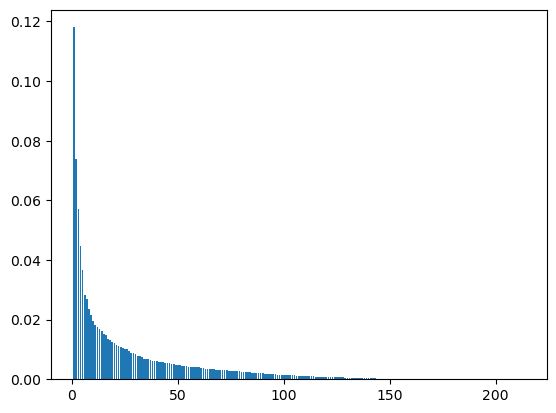

In [292]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [293]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [294]:
# Making a Scree Plot

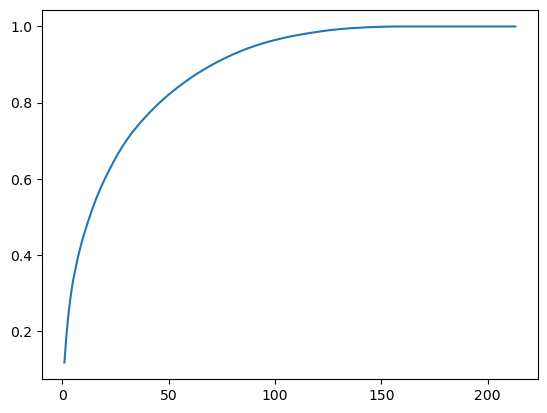

In [295]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [296]:
# PCA with 60 Components

In [297]:
from sklearn.decomposition import IncrementalPCA
pc2 = IncrementalPCA(n_components=60)
df_train_pca = pc2.fit_transform(X_train)
df_train_pca.shape

(1175, 60)

In [298]:
df_train_pca = pc2.fit_transform(x)

In [299]:
df_train_pca.shape

(1679, 60)

In [300]:
# Making a data frame out of it for convenience

In [301]:
df = pd.DataFrame(df_train_pca,columns=["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",
                                   "PC11", "PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20",
                                  "PC21", "PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30",
                                 "PC31", "PC32","PC33","PC34","PC35","PC36","PC37","PC38","PC39","PC40",
                                   "PC41", "PC42","PC43","PC44","PC45","PC46","PC47","PC48","PC49","PC50",
                                   "PC51", "PC52","PC53","PC54","PC55","PC56","PC57","PC58","PC59","PC60"])
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-0.667031,1.781290,-2.401813,-1.587893,-1.106031,0.168270,0.391409,0.464609,0.042912,1.450215,...,0.099407,0.225910,0.284735,1.584086,1.160256,0.905026,0.690289,-1.587117,0.936968,1.403975
1,-2.791935,0.479245,-1.618253,-0.226500,0.630221,0.434081,0.231167,-0.210277,0.400490,0.380369,...,-0.039075,0.202507,0.072103,0.148012,0.271010,0.081633,0.274903,0.247337,-0.076501,-0.109263
2,5.833214,0.579231,0.542433,-2.649158,-1.036360,1.967129,-4.149716,-4.325788,3.468363,-0.328761,...,0.356593,1.945102,-0.732040,-0.613338,-2.252885,-0.278138,-0.580205,-0.195236,0.119061,-1.657222
3,-2.037443,-1.263189,4.308975,1.228969,2.019303,-0.910833,1.776251,2.064164,0.016319,-1.170913,...,-2.254286,3.177563,1.183186,1.193065,0.165059,-1.107000,-1.253926,-1.431132,-2.583377,1.575437
4,-2.904034,1.375590,-4.654409,-1.861688,-0.570964,1.331541,0.964428,0.064292,-0.295363,1.456056,...,0.275014,-0.224054,0.350484,1.328259,-0.030670,0.443564,0.236914,-0.018934,0.527382,0.108001


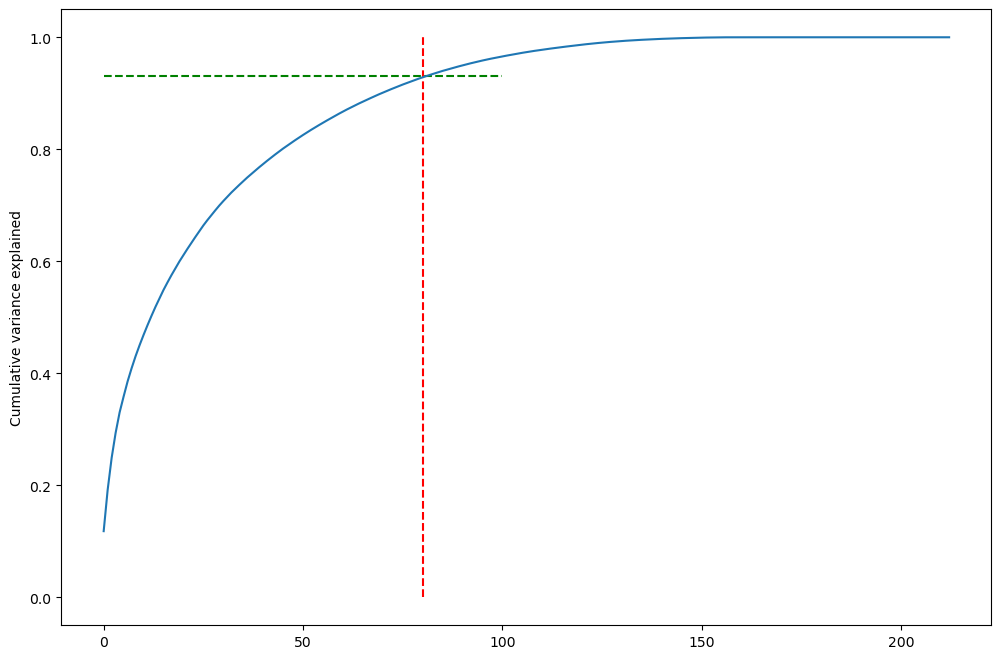

In [302]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [303]:
# Plotting the data

In [304]:
import seaborn as sns

In [305]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [306]:
# Plotting the heatmap of the corr matrix

<Axes: >

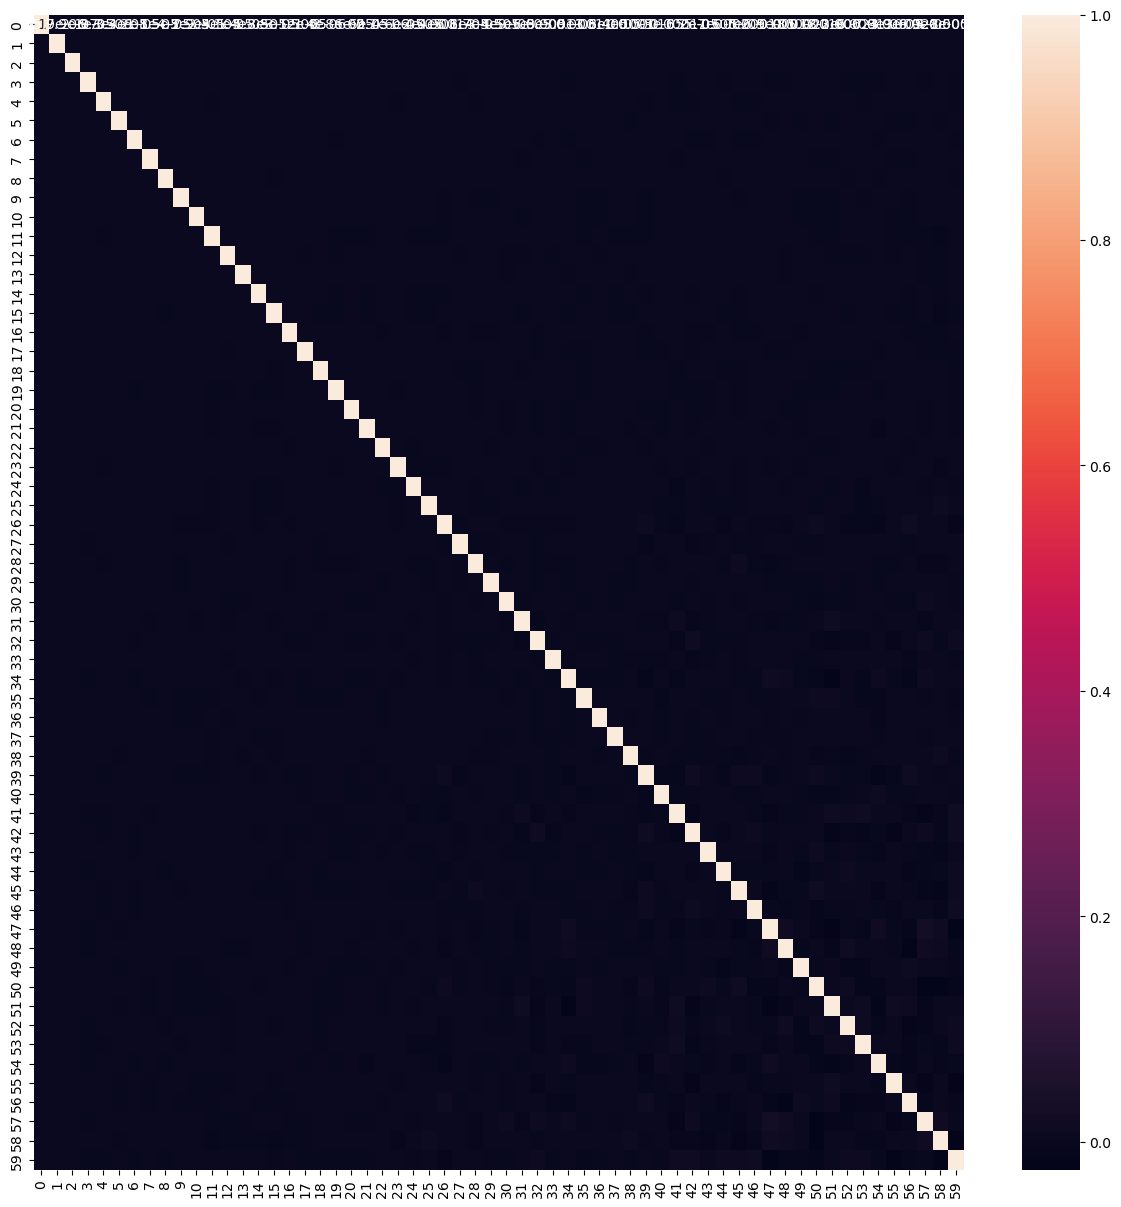

In [307]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [308]:
#Applying the transformation on the test set

In [309]:
df_test_pca = pc2.transform(X_test)
df_test_pca.shape

(504, 60)

In [310]:
# Applying logistic regression on the data on our Principal components

In [311]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [312]:
learner_pca = LogisticRegression()

In [313]:
model_pca = learner_pca.fit(df_train_pca, y)

In [314]:
# Predicted probabilities
y_pred = logreg.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.005952
1,0.005961
2,0.005960
3,0.005958
4,0.005961


In [315]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
33872,0
34191,0
81196,0
18469,0
5048,0


In [316]:
# Putting mobile_number to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['index','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,index,Churn,Churn_Prob
0,NaN,0,NaN
1,NaN,0,NaN
2,NaN,0,NaN
3,NaN,0,NaN
4,NaN,0,NaN


In [317]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,index,Churn,Churn_Prob,predicted
0,NaN,0,NaN,0
1,NaN,0,NaN,0
2,NaN,0,NaN,0
3,NaN,0,NaN,0
4,NaN,0,NaN,0


In [318]:
# Model Evaluation

In [319]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[501,   0],
       [  3,   0]], dtype=int64)

In [320]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.9940476190476191

In [321]:
# Making predictions on the test set

In [322]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [323]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.9940476190476191

In [324]:
# Feature Selection Using RFE

In [325]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False False  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False False False False
 False False False False False  True  True  True  True  True False  True
 False  True  True  True False False False False False False False False
  True  True  True  True False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False False False  True  True  True  True False False False False
 False False False False  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True False False  True
  True False  True  True False False False False  True False  True  True
 False False False False False False False False  T

In [326]:
# run random forest to get feature importance

In [327]:
from sklearn.ensemble import RandomForestClassifier

In [328]:
rf=RandomForestClassifier(n_estimators=60).fit(X_train, y_train)

In [329]:
feats=X_train.columns
for feature in zip(feats,rf.feature_importances_):
    print(feature)

('mobile_number', 0.0029756251978474233)
('loc_og_t2o_mou', 0.0)
('std_og_t2o_mou', 0.0)
('loc_ic_t2o_mou', 0.0)
('arpu_6', 0.03696947772040794)
('arpu_7', 0.012267854207913374)
('arpu_8', 0.0052714574920163645)
('arpu_9', 0.006143450291499009)
('onnet_mou_6', 0.031323391052212976)
('onnet_mou_7', 0.0027896486229819603)
('onnet_mou_8', 0.0038558066150546403)
('onnet_mou_9', 0.0)
('offnet_mou_6', 0.0028529072823253623)
('offnet_mou_7', 0.015115943874666492)
('offnet_mou_8', 0.0)
('offnet_mou_9', 0.0)
('roam_ic_mou_6', 0.012111240502408964)
('roam_ic_mou_7', 0.03340261010958834)
('roam_ic_mou_8', 0.049639714960509354)
('roam_ic_mou_9', 0.020004689548188584)
('roam_og_mou_6', 0.04185254507772633)
('roam_og_mou_7', 0.03475731762780976)
('roam_og_mou_8', 0.04339355976231181)
('roam_og_mou_9', 0.0066994200349656495)
('loc_og_t2t_mou_6', 0.004529959063890241)
('loc_og_t2t_mou_7', 0.0)
('loc_og_t2t_mou_8', 0.0)
('loc_og_t2t_mou_9', 0.0)
('loc_og_t2m_mou_6', 0.0)
('loc_og_t2m_mou_7', 0.00167378

In [330]:
cols_for_model=['arpu_9', 'onnet_mou_6','onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6','offnet_mou_7',
                'offnet_mou_8','offnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6','roam_og_mou_7',
                'roam_og_mou_8','roam_og_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7'
                'loc_og_t2m_mou_8','loc_og_t2m_mou_9', 'std_og_mou_6','std_og_mou_9','total_rech_num_8','total_rech_num_9','total_rech_amt_6', 'total_rech_amt_7', 
                'total_rech_amt_8','total_rech_amt_9','max_rech_amt_6','count_rech_3g_6','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8',
                 'arpu_3g_9','monthly_2g_6','monthly_2g_7','monthly_2g_8','aon','Churn'] 


In [331]:
#df2 = df
#df = df2[cols_for_model]
#df.shape

In [332]:
df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60'],
      dtype='object')

In [333]:
new_df=pd.concat([df,y],axis=1)

In [334]:
# Handling Imbalanced Dataset

In [335]:
print(new_df.Churn.value_counts())
new_df.Churn.value_counts(normalize = True).reset_index()

Churn
0.0    1669
1.0      10
Name: count, dtype: int64


,Churn,proportion
0,0.0,0.994044
1,1.0,0.005956


In [336]:
# Evaluation Metric

In [337]:
# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [338]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [339]:
y_pred = lreg.predict(X_test)

In [340]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9940476190476191
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       0.00      0.00      0.00         3

    accuracy                           0.99       504
   macro avg       0.50      0.50      0.50       504
weighted avg       0.99      0.99      0.99       504


 confussion matrix:
 [[501   0]
 [  3   0]]


In [341]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

14

In [342]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 7), (1, 7)]


In [343]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [344]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.9940476190476191
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       0.00      0.00      0.00         3

    accuracy                           0.99       504
   macro avg       0.50      0.50      0.50       504
weighted avg       0.99      0.99      0.99       504


 confussion matrix:
 [[501   0]
 [  3   0]]


In [345]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

1172

In [346]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 1165), (1, 7)]


In [347]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [348]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9940476190476191
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       0.00      0.00      0.00         3

    accuracy                           0.99       504
   macro avg       0.50      0.50      0.50       504
weighted avg       0.99      0.99      0.99       504


 confussion matrix:
 [[501   0]
 [  3   0]]


In [349]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

2336

In [350]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 1168), (1, 1168)]


In [351]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [352]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.9940476190476191
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       0.00      0.00      0.00         3

    accuracy                           0.99       504
   macro avg       0.50      0.50      0.50       504
weighted avg       0.99      0.99      0.99       504


 confussion matrix:
 [[501   0]
 [  3   0]]


In [353]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

2336

In [354]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 1168), (1, 1168)]


In [355]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [356]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.9940476190476191
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       0.00      0.00      0.00         3

    accuracy                           0.99       504
   macro avg       0.50      0.50      0.50       504
weighted avg       0.99      0.99      0.99       504


 confussion matrix:
 [[501   0]
 [  3   0]]


In [357]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

2337

In [358]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 1168), (1, 1169)]


In [359]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [360]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.005952380952380952
F1 score:  0.011834319526627219
Recall:  1.0
Precision:  0.005952380952380952

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       501
           1       0.01      1.00      0.01         3

    accuracy                           0.01       504
   macro avg       0.00      0.50      0.01       504
weighted avg       0.00      0.01      0.00       504


 confussion matrix:
 [[  0 501]
 [  0   3]]


In [361]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

2002

In [362]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 1001), (1, 1001)]


In [363]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [364]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.9940476190476191
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       501
           1       0.00      0.00      0.00         3

    accuracy                           0.99       504
   macro avg       0.50      0.50      0.50       504
weighted avg       0.99      0.99      0.99       504


 confussion matrix:
 [[501   0]
 [  3   0]]


In [365]:
#Decision Trees

In [366]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [367]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [368]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [369]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.9523809523809523
F1 score:  0.19999999999999998
Recall:  1.0
Precision:  0.1111111111111111

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       501
           1       0.11      1.00      0.20         3

    accuracy                           0.95       504
   macro avg       0.56      0.98      0.59       504
weighted avg       0.99      0.95      0.97       504


 confussion matrix:
 [[477  24]
 [  0   3]]


In [370]:
# Decision Trees - Tomek Links
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [371]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [372]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [373]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [374]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [375]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [376]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [377]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [378]:
# Decision Trees - SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [379]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [380]:
# Random forest

In [381]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [382]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.996031746031746
F1 score:  0.5
Recall:  0.3333333333333333
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      0.33      0.50         3

    accuracy                           1.00       504
   macro avg       1.00      0.67      0.75       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  2   1]]


In [383]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [384]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.9384920634920635
F1 score:  0.1621621621621622
Recall:  1.0
Precision:  0.08823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       501
           1       0.09      1.00      0.16         3

    accuracy                           0.94       504
   macro avg       0.54      0.97      0.57       504
weighted avg       0.99      0.94      0.96       504


 confussion matrix:
 [[470  31]
 [  0   3]]


In [385]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [386]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.996031746031746
F1 score:  0.5
Recall:  0.3333333333333333
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      0.33      0.50         3

    accuracy                           1.00       504
   macro avg       1.00      0.67      0.75       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  2   1]]


In [387]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [388]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.998015873015873
F1 score:  0.8
Recall:  0.6666666666666666
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      0.67      0.80         3

    accuracy                           1.00       504
   macro avg       1.00      0.83      0.90       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  1   2]]


In [389]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [390]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [391]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [392]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [393]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [394]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         3

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504


 confussion matrix:
 [[501   0]
 [  0   3]]


In [395]:
# Decision Trees is the best model

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [397]:
df.shape

(1679, 60)

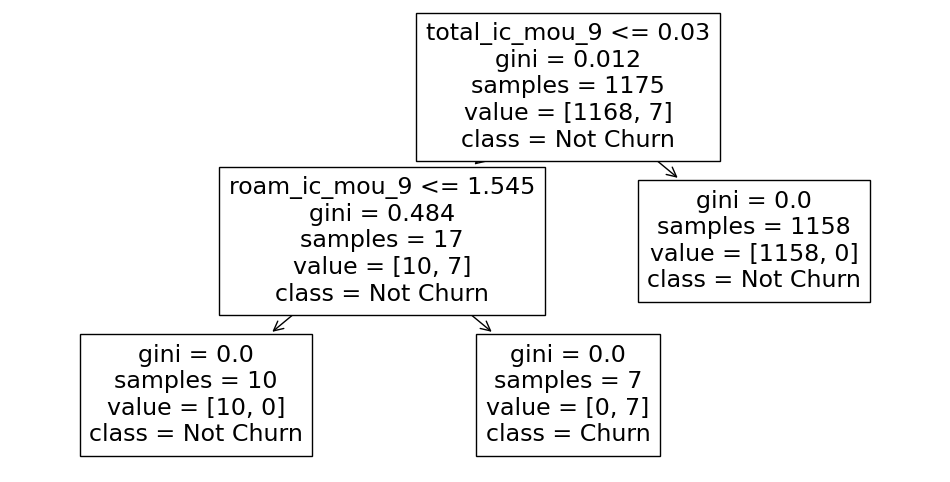

In [398]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
plt.figure(figsize=(12,6))
plot_tree(dt,feature_names=X.columns.tolist(),class_names=['Not Churn','Churn'])
plt.show()

In [399]:
#Random Forest is the best model to get important features according to our evaluations done above

In [400]:
from sklearn.ensemble import RandomForestClassifier

In [401]:
rf=RandomForestClassifier(n_estimators=60).fit(X_train, y_train)

In [402]:
feats=X_train.columns
for feature in zip(feats,rf.feature_importances_):
    print(feature)

('mobile_number', 0.004216376639057048)
('loc_og_t2o_mou', 0.0)
('std_og_t2o_mou', 0.0)
('loc_ic_t2o_mou', 0.0)
('arpu_6', 0.015082638592210236)
('arpu_7', 0.025811081170162214)
('arpu_8', 0.011627746658426908)
('arpu_9', 0.0021556996086105605)
('onnet_mou_6', 0.02344802468346469)
('onnet_mou_7', 0.0)
('onnet_mou_8', 0.0)
('onnet_mou_9', 0.0)
('offnet_mou_6', 0.01453854391200171)
('offnet_mou_7', 0.0028581581436992937)
('offnet_mou_8', 0.0028617019866342647)
('offnet_mou_9', 0.0017240746854480693)
('roam_ic_mou_6', 0.012263417834943802)
('roam_ic_mou_7', 0.015517027042807533)
('roam_ic_mou_8', 0.03543604327960539)
('roam_ic_mou_9', 0.05149587865708271)
('roam_og_mou_6', 0.016583664224969857)
('roam_og_mou_7', 0.04233696247927298)
('roam_og_mou_8', 0.010269812583765577)
('roam_og_mou_9', 0.026885611775841523)
('loc_og_t2t_mou_6', 0.0)
('loc_og_t2t_mou_7', 0.0)
('loc_og_t2t_mou_8', 0.0012235759658440057)
('loc_og_t2t_mou_9', 0.0)
('loc_og_t2m_mou_6', 0.0)
('loc_og_t2m_mou_7', 0.0)
('loc_

In [403]:
imp_cols=['arpu_9', 'onnet_mou_6','onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6','offnet_mou_7',
                'offnet_mou_8','offnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6','roam_og_mou_7',
                'roam_og_mou_8','roam_og_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7'
                'loc_og_t2m_mou_8','loc_og_t2m_mou_9', 'std_og_mou_6','std_og_mou_9','total_rech_num_8','total_rech_num_9','total_rech_amt_6', 'total_rech_amt_7', 
                'total_rech_amt_8','total_rech_amt_9','max_rech_amt_6','count_rech_3g_6','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8',
                 'arpu_3g_9','monthly_2g_6','monthly_2g_7','monthly_2g_8','aon','Churn']

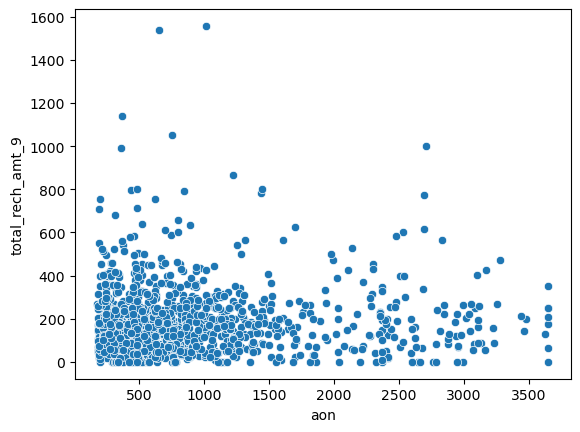

In [404]:
sns.scatterplot(x=X_train["aon"],y=X_train["total_rech_amt_9"])
plt.show()

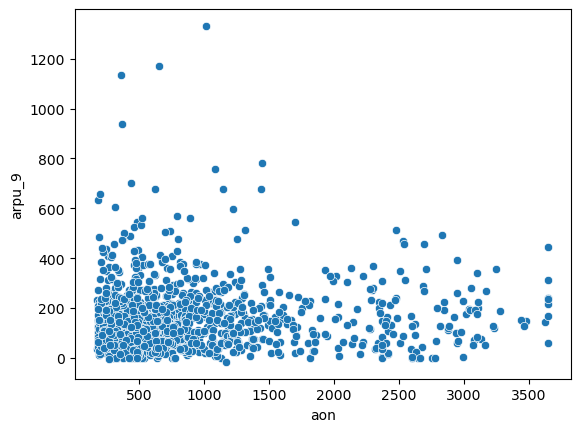

In [405]:
sns.scatterplot(x=X_train["aon"],y=X_train["arpu_9"])
plt.show()

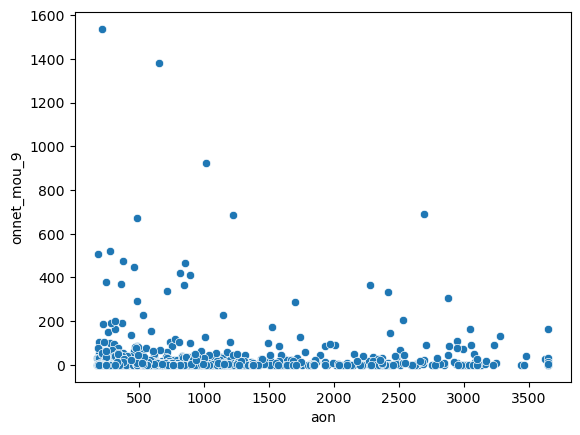

In [406]:
sns.scatterplot(x=X_train["aon"],y=X_train["onnet_mou_9"])
plt.show()

## Important predictor attributes which help the business understand indicators of churn.
## 1. aon
## 2. arpu_7
## 3. aru_8
## 4. total_rech_amt_7
## 5. total_rech_amt_8
## 6. monthly_2g_7
## 7. monthly_2g_8
## 8. monthly_2g_7
## 9. monthly_2g_8
## 10.av_rech_amt_data_9
## 11. Churn
## 12. arpu_3g_9

## Recommendations

# 1. ARPU Should be increased and to increase ARPU, high value customers must be given good offers.
# 2. Internet packages prices need to be less compared to other networks.
# 3. Age on network need to be increased by giving recharge incentives to top high value customers.
# 4. Good Network needed or there should be more towers of network in high value customer's circle_ids.
# 5. Local t2t should be encouraged by giving recharge special offers.

